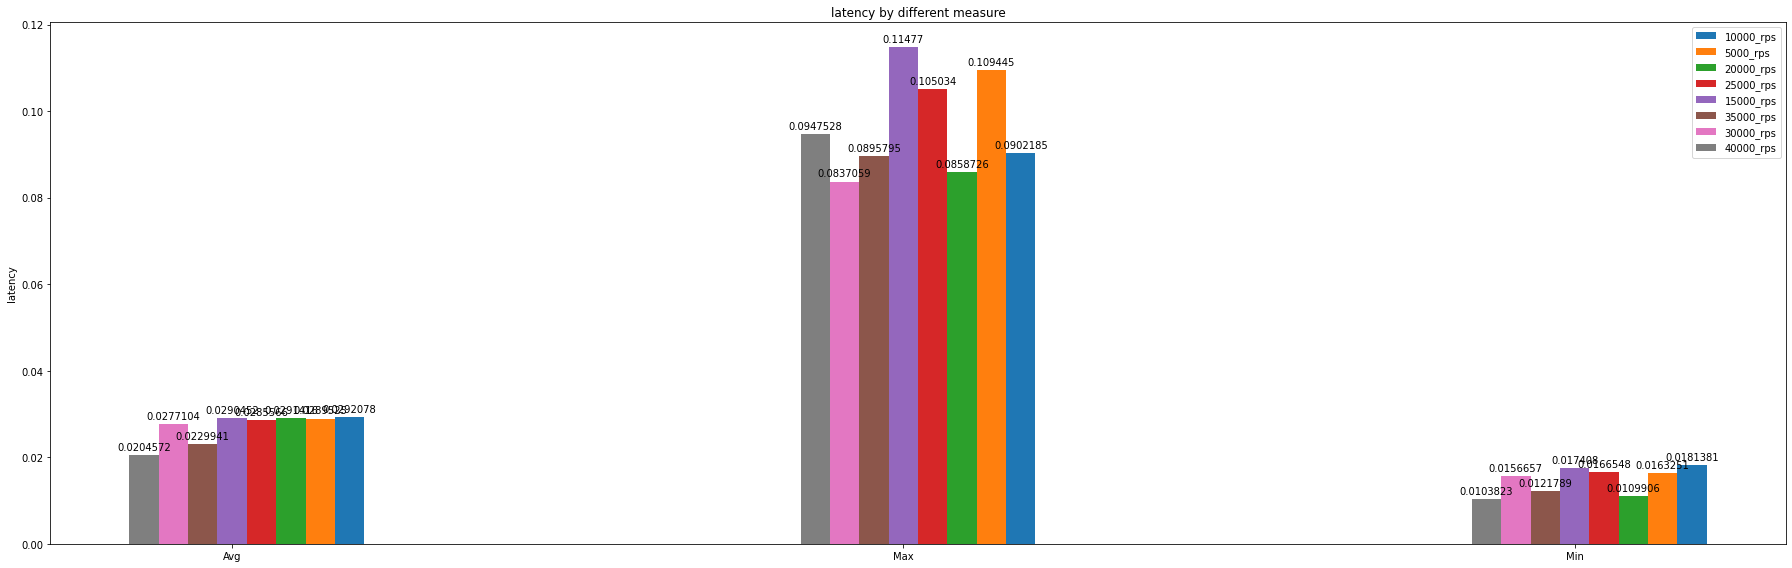

In [23]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

benchmark_suit_dir = "./example_benchmark_suite"
benchmark_result_dir = benchmark_suit_dir + '/results'

labels = []

labels = ['Avg', 'Max', 'Min']
data = {}

for benchmark_result in os.listdir(benchmark_result_dir):
    file_name = benchmark_result_dir + '/' + benchmark_result + '/nighthawk_result.json'
    f = open(file_name)
    json_data = json.load(f)
    data[benchmark_result] = [json_data['DurationHistogram']['Avg'], json_data['DurationHistogram']['Max'], json_data['DurationHistogram']['Min']]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 8), sharey=True)
rects = []

num_result = len(data.keys())
each_width = width/num_result
i = 0 - (num_result/2 * each_width)

for benchmark_result in data:
    rect = ax.bar(x - i, data[benchmark_result], each_width, label=benchmark_result)
    ax.bar_label(rect, padding=3)
    rects.append(rect)
    i += each_width
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('latency')
ax.set_title('latency by different measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

['5000_rps', '10000_rps', '15000_rps', '20000_rps', '25000_rps', '30000_rps', '35000_rps', '40000_rps']


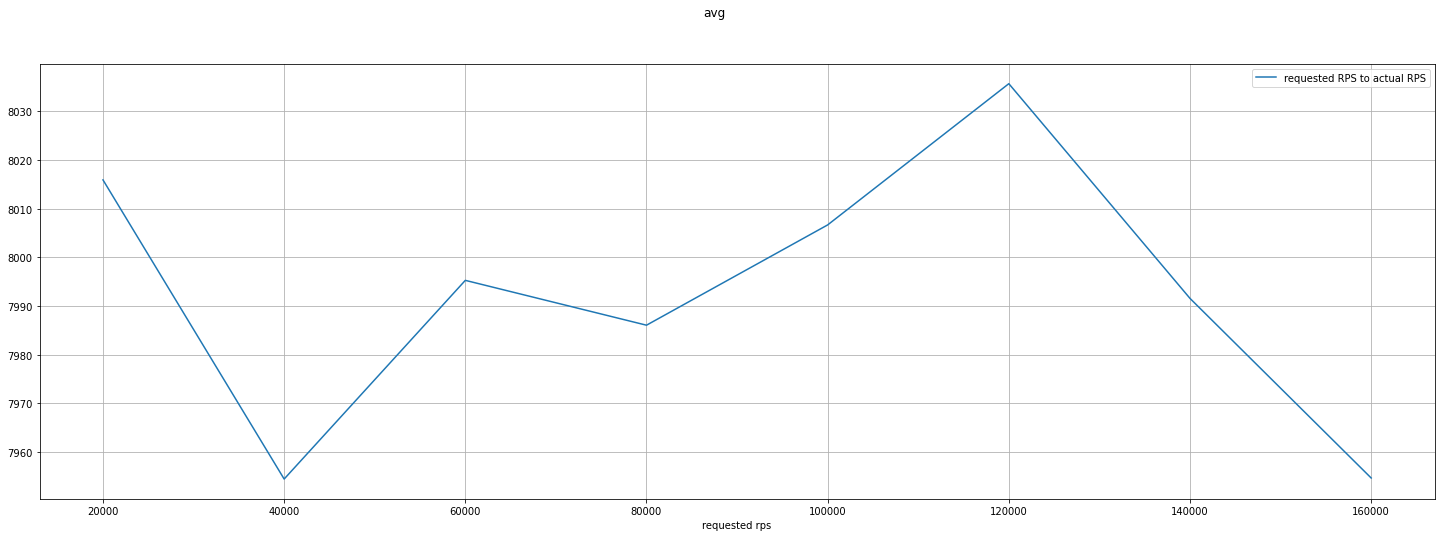

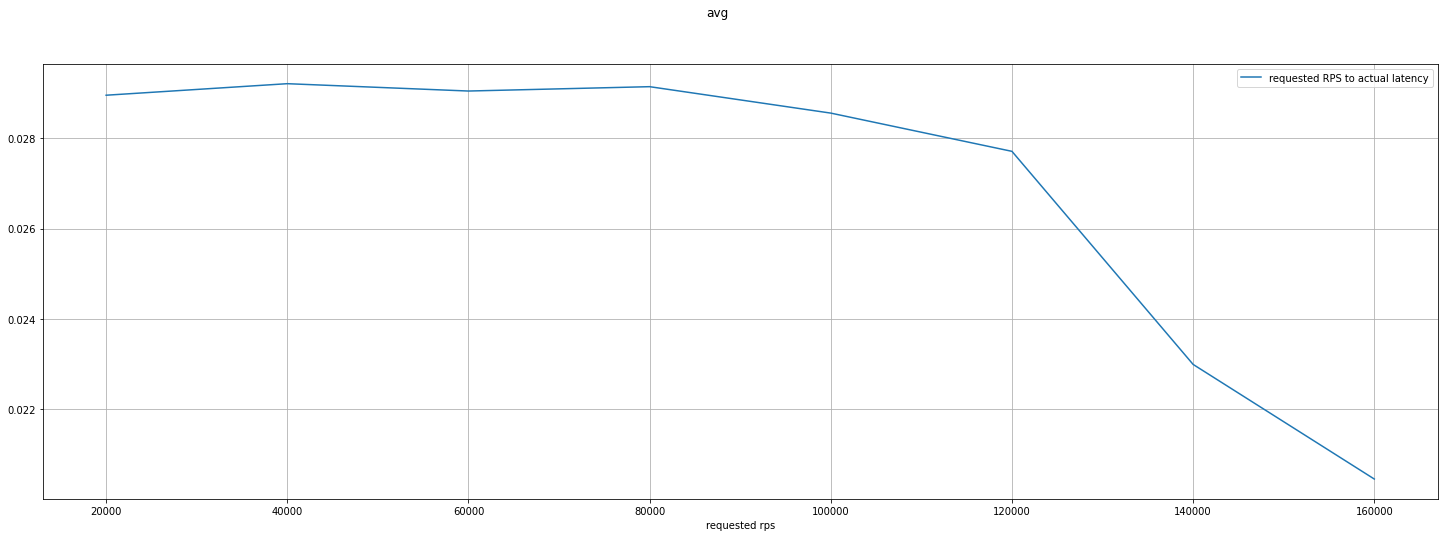

In [31]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

benchmark_suit_dir = "./example_benchmark_suite"
benchmark_result_dir = benchmark_suit_dir + '/results'

labels = []

labels = ['Avg', 'Max', 'Min']
data = {}

requested_rps_to_actual_rps = {}
requested_rps_to_actual_latency = {}

results = list(os.listdir(benchmark_result_dir))
results.sort()

results = sorted(results, key=lambda r: int(r.split('_')[0]) )
print(results)
for benchmark_result in results:
    file_name = benchmark_result_dir + '/' + benchmark_result + '/nighthawk_result.json'
    f = open(file_name)
    json_data = json.load(f)
    requested_rps_to_actual_rps[json_data['RequestedQPS']] = json_data['ActualQPS']
    requested_rps_to_actual_latency[json_data['RequestedQPS']] = json_data['DurationHistogram']['Avg']

p1 = [
    {
        'title': 'avg',
        'axs': [
            {
                'label': 'requested RPS to actual RPS',
                'map': requested_rps_to_actual_rps
            },
        ]
    }
]
    
p2 = [
    {
        'title': 'avg',
        'axs': [
            {
                'label': 'requested RPS to actual latency',
                'map': requested_rps_to_actual_latency
            }
        ]
    }
]

def generate_plots(everything_):
    for data_maps in everything_:
        fig, axs = plt.subplots(figsize=(25, 8), sharey=True)
        fig.suptitle(data_maps['title'])
        for axs_data in data_maps['axs']:
            axs.plot(list(axs_data['map'].keys()), list(axs_data['map'].values()), label=axs_data['label'])
        axs.grid(True)
        axs.legend()
        axs.set_xlabel('requested rps')

                 
generate_plots(p1)
generate_plots(p2)

plt.show()